# Bank Marketing Campaign: Get Customers Prospective

## Business Problem Understanding

**Context / Domain Knowledge**

The types of financial products used by the public are more varied. One financial product that is well-known to the public is term deposits. The term deposit mechanism is that a customer deposits a sum of money at a bank or a financial institution, and the money can only be withdrawn after a certain period of time. As compensation, customers will be given a fixed interest according to the nominal amount of money deposited.

Target : Deposit

No : Not Interested Deposit

Yes : Interested Deposit

**Business Problem**

The bank is committed to continuously compete in order to avoid losing customers. One way to achieve this is by conducting a Marketing Campaign to acquire new customers. However, the bank wants this Marketing Campaign to be efficient in order to minimize costs and time.

Based on previous Marketing Campaign data, in order to make the Marketing Campaign more efficient, there is a need for a system that can assist the bank, particularly the Marketing Team, in predicting whether a prospective customer is interested in making a deposit or not after receiving an offer through the Marketing Campaign. Because if the bank offers a deposit product to an uninterested prospective customer, it would result in wasted costs and time in conducting the Marketing Campaign.

**Goals**

Based on the above problem, the bank desires a system that can predict as many prospective customers as possible who are interested in making a deposit. Additionally, the system should also be able to make accurate predictions to obtain prospective customers who are genuinely interested in making a deposit. This way, the bank can be more efficient in conducting Marketing Campaigns and subsequently provide the best service to customers who have made a deposit.

In addition, the bank wants to identify the factors that influence whether a prospective customer is interested or not interested in making a deposit.




**Analytic Approach**

I will conduct an analysis to identify patterns and characteristics that distinguish prospective customers who are interested in making a deposit from those who are not interested, based on the available features.

Then, I will build an accurate classification model to predict the likelihood of prospective customers being interested or not interested in making a deposit.

**Determine Method Evaluation**

TP: Prospective Customers predicted to be interested in making a deposit and actually interested in making a deposit.

TN: Prospective Customers predicted not to be interested in making a deposit and actually not interested in making a deposit.

FP: Prospective Customers predicted to be interested in making a deposit but actually not interested in making a deposit.

FN: Prospective Customers predicted not to be interested in making a deposit but actually interested in making a deposit.

False Positive (FP) Risk: Wasted cost and time in acquiring potential customers who are actually not interested in making a deposit.

False Negative (FN) Risk: Missing out on potential customers who are actually interested in making a deposit.

Based on the risks, I will build a model that can minimize the high cost risk of acquiring prospective customers who are interested in making a deposit, without losing too many prospective customers who are actually interested in making a deposit. Therefore, the model will aim to maximize True Positives while minimizing False Positives. Hence, the evaluation method to be used is **ROC_AUC**.


Brief explanation & Reasons for choosing **ROC_AUC** :

The ROC_AUC (Receiver Operating Characteristic Area Under the Curve) metric is used to evaluate the performance of binary classification models. ROC AUC plots the True Positive Rate (TPR) against the False Positive Rate (FPR). 

TPR represents the ratio of correctly predicted positive instances (TP) to the total positive instances (TP + FN), while FPR represents the ratio of incorrectly predicted positive instances (FP) to the total negative instances (FP + TN).

_so the ROC_AUC indicates how well the model can differentiate between positive and negative classes_.

If a model exhibits a ROC curve that reaches the top-left corner of the plot or ROC_AUC score approaches to 1, it indicates a good performance. This signifies a _high TPR (minimize missing out on prospective new customers)_ and a _low FPR (minimize wasted cost & time)_. 

## Data Understanding

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno 
import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = pd.read_csv(r'C:\Users\ASUS\Documents\Contoh Dataset\Bank_Marketing.csv')
display(df.head(5),df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


None

**Data Definition**

- Feature 
1. age = Age prospective customer
2. job = Job prospective customer
3. balance = Prospective Customer's account balance
4. housing = Having a housing loan
5. loan = Having a personal loan
6. contact = Contacting the prospective customer method
7. month = Last contact month
8. campaign = Number of contacts performed during the campaign
9. pdays = Number of days passed after the prospective customer was last contacted from the previous campaign
10. poutcome = Outcome of the previous campaign

- Target
1. deposit
    - yes = Prospective customer _interested deposit_
    - no = Prospective Customer _not interested deposit_

## Data Cleaning

In [3]:
listData = []
for col in df.columns:
    listData.append([col, df[col].count() ,df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100,2), df[col].nunique(), df[col].unique()])

df1 = pd.DataFrame(columns=['Columns','CountData', 'DataType', 'Null','%Null','Nunique','Unique'],data=listData)
display(df1)


,Columns,CountData,DataType,Null,%Null,Nunique,Unique
0,age,7813,int64,0,0.0,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,7813,object,0,0.0,12,"[admin., self-employed, services, housemaid, t..."
2,balance,7813,int64,0,0.0,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,7813,object,0,0.0,2,"[no, yes]"
4,loan,7813,object,0,0.0,2,"[no, yes]"
5,contact,7813,object,0,0.0,3,"[cellular, telephone, unknown]"
6,month,7813,object,0,0.0,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,7813,int64,0,0.0,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,7813,int64,0,0.0,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,7813,object,0,0.0,4,"[unknown, other, failure, success]"


1. Error Data Type

Based on the table above, the dataset has no data type errors, so nothing has been changed. Including the `month` column, there is no need to change its data type to 'date' because the value contains only 3 month letters, not the dd-mm-yy format.

2. Check Missing Values

Based on the table above, no missing values were found in the dataset, although there is a value of '-1' in the column `pdays`. This value indicates that the customer will be contacted tomorrow.

3. Check Duplicate Values

In [4]:
check_duplicate = df.duplicated().sum().sum()
results = print(f'Number Of Duplicate Data : ',check_duplicate)
display(results,df[df.duplicated()])

Number Of Duplicate Data :  8


None

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,yes
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,no
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,no
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,no
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,no
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,no
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,yes



Based on the table above, the duplicated data does not have identical values in each column. For example, in the `age` column, each value is different, implying that each data represents a different prospective customer. Therefore, my decision is not to remove the 8 identified duplicated data.

## EDA ##

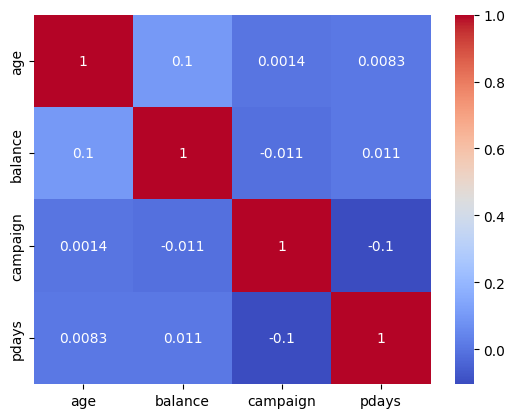

In [5]:
correlation = df.corr()
sns.heatmap(correlation,cmap='coolwarm',annot=True)
plt.show()

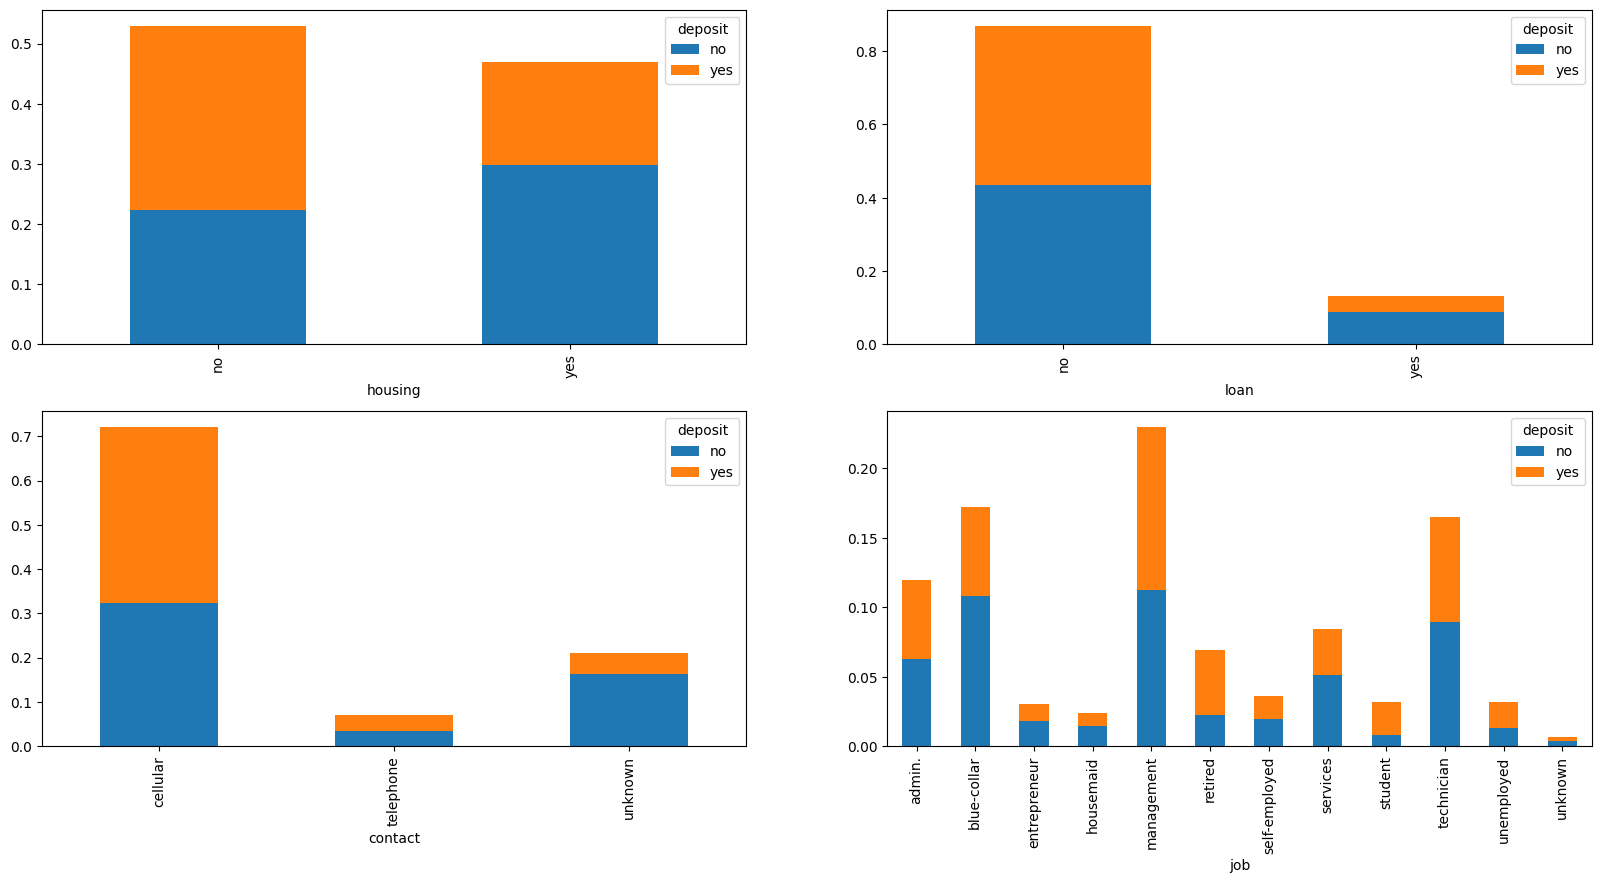

In [6]:
count = 0
fig = plt.figure(figsize=(20,20))
for i in df[['housing','loan','contact','job']]:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['deposit'],normalize=True).plot(kind='bar',stacked=True,ax=ax)
plt.show()

In [7]:
df3 = df.copy()
def category_age(x):
    if x <= 25 :
        return 'Young'
    elif x <= 45 :
        return 'Adult'
    elif x > 45:
        return 'Old'
df3['category_age'] = df3['age'].apply(category_age)
df3.groupby('category_age')['deposit'].value_counts(normalize=True).unstack()

deposit,no,yes
category_age,,
Adult,0.549628,0.450372
Old,0.493895,0.506105
Young,0.315961,0.684039


In [8]:
def category_balance(x):
    if x < 0 :
        return '< 0'
    elif x <= 1000 :
        return '< 1000'
    elif x > 1000:
        return '> 1000'
df3['category_balance'] = df3['balance'].apply(category_balance)
df3.groupby('category_balance')['deposit'].value_counts(normalize=True).unstack()

deposit,no,yes
category_balance,,
< 0,0.707724,0.292276
< 1000,0.557645,0.442355
> 1000,0.434103,0.565897


Based on heatmap, barplots and tables above, I got some insights, namely : 

1. Based on heatmap, there is a negative correlation between the 'campaign' and 'pdays' columns. It indicates that if the prospective customer is contacted more frequently during the campaign, then the number of days passed since the last contact will decrease.
2. Based on the `housing` barplot, prospective customers who do not have a housing loan tend to have a higher potential for being interested in a deposit compared to those who have a housing loan.
3. Based on the `loan` barplot, prospective customers who do not have a personal loan tend to have a higher potential for being interested in a deposit compared to those who have a loan.
4. Based on the `contact` barplot, contacting prospective customers via cellular communication has a higher potential for attracting prospective customers who are interested in a deposit.
5. Based on the `job` barplot, prospective customers working in the management field have a higher potential for being interested in a deposit.
6. Based on the `age` table, prospective customers in the teenage age range (18-25 years old) have a higher potential for being interested in a deposit.
7. Based on the `balance` table, prospective customers with a negative balance are more likely to not be interested in a deposit.

## Data Preprocessing - Feature Engineering 

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,RobustScaler,MinMaxScaler
import category_encoders as ce
from sklearn.model_selection import train_test_split

1. Replace the value column `deposit` (target) from 'yes' to '1' and from 'no' to '0'.

In [10]:
df['deposit'] = df['deposit'].replace({'no':0,'yes':1}) 

2. Splitting dataset

In [11]:
X = df.drop(columns=['deposit'])
y = df['deposit']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y,test_size=0.2)

3. I want to perform feature encoding and scaling for categorical and numerical features in the dataset. Here's what I will do :

- Categorical
    -  I will encode the `job` column using Binary Encoding since the column has no inherent order and has 12 unique values. If I use One Hot Encoding, it will result in too many new columns, which can potentially lead to overfitting.
    - I will encode the `housing` column using One Hot Encoding since the column has no inherent order and has only 2 unique values.
    - I will encode the `loan` column using One Hot Encoding since the column has no inherent order and has only 2 unique values.
    - I will encode the `contact` column using One Hot Encoding since the column has no inherent order and has only 3 unique values.
    - I will encode the `month` column using Ordinal Encoding since the column has an inherent order and has 12 unique values.
    - I will encode the `poutcome` column using One Hot Encoding since the column has no inherent order and has 4 unique values.

- Numerical
    - I will apply scaling to the `balance` column, considering its minimum value of -6847 and maximum value of 66653. The purpose is to potentially improve the modeling results. I will use the RobustScaler method to ensure that the data retains its order and is not sensitive to outliers.
    - I will apply scaling to the `campaign` column, even though its minimum value is 1 and maximum value is 63. The objective is to potentially enhance the modeling results. I will use the RobustScaler method to maintain the order of the data and ensure that it is not affected by outliers.
    - I will apply scaling to the `pdays` column, despite its minimum value of -1 and maximum value of 854. The aim is to potentially improve the modeling results. I will use the RobustScaler method to preserve the order of the data and make it robust to outliers.
    - I will not apply scaling to the `age` column as it already has a clear interval to distinguish the age of each prospective customer, and the range of values is not significantly large, with a minimum of 18 and maximum of 95.


In [12]:
ct = ColumnTransformer(transformers=[
    ("OneHotEncoding",OneHotEncoder(drop='first'),['housing','loan','contact','poutcome']),
    ("OrdinalEncoding",ce.OrdinalEncoder(),['month']),
    ("BinaryEncoding",ce.BinaryEncoder(),['job']),
    ("RobustScaler",RobustScaler(),['balance','campaign','pdays']),
],remainder='passthrough',verbose_feature_names_out=False)

ct.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoding', OneHotEncoder(drop='first'),
                                 ['housing', 'loan', 'contact', 'poutcome']),
                                ('OrdinalEncoding', OrdinalEncoder(),
                                 ['month']),
                                ('BinaryEncoding', BinaryEncoder(), ['job']),
                                ('RobustScaler', RobustScaler(),
                                 ['balance', 'campaign', 'pdays'])],
                  verbose_feature_names_out=False)

In [13]:
bin_cols = ct.named_transformers_['BinaryEncoding'].get_feature_names_out()
ohe_cols = ct.named_transformers_['OneHotEncoding'].get_feature_names_out()
ord_cols = ct.named_transformers_['OrdinalEncoding'].get_feature_names_out()
scal_cols = ct.named_transformers_['RobustScaler'].get_feature_names_out()
all_cols = list(ohe_cols) + list(ord_cols) + list(bin_cols) + list(scal_cols) + ['age']

In [14]:
X_train_pre = ct.fit_transform(X_train)
df_Xtrain_pre = pd.DataFrame(X_train_pre,columns=all_cols)
df_Xtrain_pre

,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,month,job_0,job_1,job_2,job_3,balance,campaign,pdays,age
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.004476,0.0,3.448980,56.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.106155,-0.5,0.000000,32.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,-0.311431,-0.5,0.000000,30.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,-0.486651,-0.5,11.836735,31.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,-0.555076,-0.5,0.000000,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.177138,-0.5,7.571429,23.0
6246,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.184812,-0.5,0.000000,32.0
6247,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,1.0,0.0,-0.334452,0.0,0.000000,35.0
6248,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,1.0,-0.349161,0.0,0.000000,32.0


## Model Benchmark

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix,ConfusionMatrixDisplay, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

In [16]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=100)
svm = SVC()
lgbm = LGBMClassifier()
rf = RandomForestClassifier(random_state=100)
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()

models = [logreg,knn,tree,svm,lgbm,rf,gbc,abc]
name_models = ['LogisticRegression','KNN','DecisionTree','SVM','LGBM','Random Forest','GradientBoosting','AdaBoosting']

##### 1. Check proportion 'Target'

In [17]:
y.value_counts(normalize=True)

0    0.522335
1    0.477665
Name: deposit, dtype: float64

Based on checking proportion above, the proportions of value 0 and 1 are balanced, with a difference of less than 10% (4.5%). Therefore, there is no need to use Imbalance methods to balance the target proportion.

##### 2. Make predictions on train and test data with using `Cross Validation`

In [18]:
def pipeline_cross_validation(model):
    pipe = Pipeline([
        ("Column Transform",ct),
        ("Model",model)
    ],verbose=False)    
    return pipe

In [19]:
test_score = []
for model in models:
    pipeline = pipeline_cross_validation(model)
    pipeline.fit(X_train,y_train)    
    test_predict = pipeline.predict(X_test)
    test_predict_score= roc_auc_score(y_test,test_predict)
    test_score.append(test_predict_score)

In [20]:
def cross_validation(model,X_train,y_train):
    pipe = pipeline_cross_validation(model)
    pipe = pipe.fit(X_train,y_train)
    cross_val = cross_val_score(pipe,X_train,y_train,cv=StratifiedKFold(n_splits=5),scoring='roc_auc')
    return cross_val

In [21]:
train_score_cval = []
mean_score_cval = []
std_score_cval =[]
for model in models:
    score_roc_auc = cross_validation(model,X_train,y_train)
    mean_score_roc_auc = np.mean(score_roc_auc)
    std_score_roc_auc = np.std(score_roc_auc)
    train_score_cval.append(score_roc_auc)
    mean_score_cval.append(mean_score_roc_auc)
    std_score_cval.append(std_score_roc_auc)

In [22]:
data_mean_std_test_cval = list(zip(name_models,mean_score_cval,std_score_cval,test_score))
df_train_score_cval = pd.DataFrame(data=train_score_cval,columns=['Iteration1','Iteration2','Iteration3','Iteration4','Iteration5'],index=name_models).reset_index().rename(columns={'index':'Model'})
df_mean_std_test_cval = pd.DataFrame(data=data_mean_std_test_cval,columns=['Model','Mean Score Cval','Std Score Cval','Test Score'])
df_cross_validation = df_train_score_cval.merge(df_mean_std_test_cval,on='Model')
df_cross_validation

,Model,Iteration1,Iteration2,Iteration3,Iteration4,Iteration5,Mean Score Cval,Std Score Cval,Test Score
0,LogisticRegression,0.730775,0.742085,0.720442,0.738586,0.745278,0.735433,0.008917,0.686868
1,KNN,0.693177,0.704877,0.682681,0.678773,0.687965,0.689495,0.009098,0.669625
2,DecisionTree,0.607236,0.613481,0.587423,0.628556,0.618291,0.610997,0.013694,0.646473
3,SVM,0.706429,0.706845,0.705090,0.724108,0.666818,0.701858,0.018863,0.669255
4,LGBM,0.767777,0.783423,0.756855,0.772328,0.762642,0.768605,0.009031,0.718268
5,Random Forest,0.765291,0.769888,0.732932,0.759307,0.748673,0.755218,0.013213,0.703628
6,GradientBoosting,0.766972,0.792255,0.759853,0.776528,0.772247,0.773571,0.010875,0.734935
7,AdaBoosting,0.758028,0.775710,0.757620,0.767287,0.758117,0.763352,0.007167,0.720672


Based on the table above, after performing predictions on the training and test data using the evaluation metrics 'ROC_AUC' and 'Cross Validation' method, I obtained the following insights :

- From Iteration1 to Iteration5 and the standard deviation values, it can be observed that all models demonstrate relatively stable performance.
- The `DecisionTreeClassifier` and `KNeighborsClassifier` models exhibit underfitting. This can be inferred from their lower values on 'Mean Score Cval' and 'Test Score'.
- The `GradientBoostingClassifier` model consistently achieves the highest and relatively stable values for 'Mean Score Cval' and 'Test Score'.

Next, I will proceed with re-data preprocessing and feature engineering by incorporating feature selection and creating new polynomial features. The objective is to determine whether the model's scores show improvement or not.


## Re : Data Preprocessing & Feature Engineering

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest

select = SelectKBest(k=20)
poly = PolynomialFeatures(degree=2,include_bias=False)

ct1 = ColumnTransformer(transformers=[
    ("OneHotEncoding",OneHotEncoder(drop='first'),['housing','loan','contact','poutcome']),
    ("OrdinalEncoding",ce.OrdinalEncoder(),['month']),
    ("BinaryEncoding",ce.BinaryEncoder(),['job']),
    ("RobustScaler",RobustScaler(),['balance','campaign','pdays']),
    ("Polynomial",PolynomialFeatures(degree=2,include_bias=False),['balance','campaign','pdays']),
],remainder='passthrough',verbose_feature_names_out=False)
ct1.fit(X_train,y_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoding', OneHotEncoder(drop='first'),
                                 ['housing', 'loan', 'contact', 'poutcome']),
                                ('OrdinalEncoding', OrdinalEncoder(),
                                 ['month']),
                                ('BinaryEncoding', BinaryEncoder(), ['job']),
                                ('RobustScaler', RobustScaler(),
                                 ['balance', 'campaign', 'pdays']),
                                ('Polynomial',
                                 PolynomialFeatures(include_bias=False),
                                 ['balance', 'campaign', 'pdays'])],
                  verbose_feature_names_out=False)

In [24]:
def pipeline_cross_validation_2(model):
    pipe2 = Pipeline([
        ("Column Transform",ct1),
        ("Feature Selection",select),
        ("Model",model)
    ],verbose=False)
    return pipe2

In [25]:
test_score_re = []
for model in models:
    pipeline2 = pipeline_cross_validation_2(model)
    pipeline2.fit(X_train,y_train)    
    test_predict_re = pipeline2.predict(X_test)
    test_predict_score_re= roc_auc_score(y_test,test_predict_re)
    test_score_re.append(test_predict_score_re)

In [26]:
def cross_validation2(model,X_train,y_train):
    pipe2 = pipeline_cross_validation_2(model)
    pipe2 = pipe2.fit(X_train,y_train)
    cross_val2 = cross_val_score(pipe2,X_train,y_train,cv=StratifiedKFold(),scoring='roc_auc')
    return cross_val2

In [27]:
train_score_cval_re = []
mean_score_cval_re = []
std_score_cval_re =[]
for model in models:
    score_roc_auc2 = cross_validation2(model,X_train,y_train)
    std_score_roc_auc2 = np.std(score_roc_auc2)
    mean_score_roc_auc2 = np.mean(score_roc_auc2)
    train_score_cval_re.append(score_roc_auc2)
    mean_score_cval_re.append(mean_score_roc_auc2)
    std_score_cval_re.append(std_score_roc_auc2)

In [28]:
data_mean_std_test_cval_re = list(zip(name_models,mean_score_cval_re,std_score_cval_re,test_score_re))
df_train_score_cval_re = pd.DataFrame(data=train_score_cval_re,columns=['Iteration1','Iteration2','Iteration3','Iteration4','Iteration5'],index=name_models).reset_index().rename(columns={'index':'Model'})
df_mean_std_test_cval_re = pd.DataFrame(data=data_mean_std_test_cval_re,columns=['Model','Mean Score Cval','Std Score Cval','Test Score'])
df_cross_validation_re = df_train_score_cval_re.merge(df_mean_std_test_cval_re,on='Model')
display("Table 1. Result Preprocessing & Feature Engineering (Without Polynomial & Feature Selection)",df_cross_validation,"Table 2. Result Re : Data Preprocessing & Feature Engineering (With Polynomial & Feature Selection)",df_cross_validation_re)

'Table 1. Result Preprocessing & Feature Engineering (Without Polynomial & Feature Selection)'

,Model,Iteration1,Iteration2,Iteration3,Iteration4,Iteration5,Mean Score Cval,Std Score Cval,Test Score
0,LogisticRegression,0.730775,0.742085,0.720442,0.738586,0.745278,0.735433,0.008917,0.686868
1,KNN,0.693177,0.704877,0.682681,0.678773,0.687965,0.689495,0.009098,0.669625
2,DecisionTree,0.607236,0.613481,0.587423,0.628556,0.618291,0.610997,0.013694,0.646473
3,SVM,0.706429,0.706845,0.705090,0.724108,0.666818,0.701858,0.018863,0.669255
4,LGBM,0.767777,0.783423,0.756855,0.772328,0.762642,0.768605,0.009031,0.718268
5,Random Forest,0.765291,0.769888,0.732932,0.759307,0.748673,0.755218,0.013213,0.703628
6,GradientBoosting,0.766972,0.792255,0.759853,0.776528,0.772247,0.773571,0.010875,0.734935
7,AdaBoosting,0.758028,0.775710,0.757620,0.767287,0.758117,0.763352,0.007167,0.720672


'Table 2. Result Re : Data Preprocessing & Feature Engineering (With Polynomial & Feature Selection)'

,Model,Iteration1,Iteration2,Iteration3,Iteration4,Iteration5,Mean Score Cval,Std Score Cval,Test Score
0,LogisticRegression,0.626376,0.636846,0.632353,0.654374,0.639431,0.637876,0.009364,0.660264
1,KNN,0.610517,0.606366,0.605941,0.619069,0.621339,0.612646,0.006415,0.586771
2,DecisionTree,0.603742,0.601911,0.620516,0.626953,0.621668,0.614958,0.010157,0.644202
3,SVM,0.553790,0.572489,0.607250,0.566200,0.556810,0.571308,0.019164,0.595332
4,LGBM,0.769874,0.769910,0.748318,0.760280,0.765427,0.762762,0.008045,0.714591
5,Random Forest,0.741646,0.738328,0.725483,0.748006,0.723544,0.735401,0.009438,0.696172
6,GradientBoosting,0.763843,0.778476,0.761673,0.774817,0.776063,0.770975,0.006845,0.728138
7,AdaBoosting,0.749148,0.763425,0.753090,0.763111,0.761834,0.758122,0.005876,0.712659


Based on the 'Table 1' and 'Table 2' above regarding the results of Data Preprocessing & Feature Engineering Without and With Polynomial & Feature Selection, I have obtained several insights:

1. 'Iteration1' to 'Iteration5' in 'Table 1' and 'Table 2' yield fairly consistent scores with no significant differences.
2. Each model in 'Table 2' has a lower 'Mean Score Cval' compared to 'Table 1'.
3. Each model in 'Table 2' has a lower 'Test Score' compared to 'Table 1'.
4. In 'Table 2', models such as `KNN`, `Decision Tree`, `LGBM`, `Random Forest`, `GradientBoosting`, and `AdaBoosting` have lower 'Std Score Cval' than in 'Table 1', indicating that these models have become more consistent or stable.
5. In 'Table 2', there are more models that experience underfitting, namely  `LogisticRegression`, `KNN`, `Decision Tree`, `SVM` as they have low values for 'Mean Score Cval' and 'Test Score'.


Based on the insights obtained above, I have decided to use the `GradientBoosting` model without using Polynomial & Feature Selection. This decision is based on the fact that `GradientBoosting` has high 'Mean Score Cval' and 'Test Score' compared to other models, and the 'Std Score Cval' values in both 'Table 1' and 'Table 2' are not significantly different.

## Hyperparameter Tunning

Brief explanation GradientBoosting : 

GradientBoosting is a ensemble learning. It combines multiple weak predictive models (mostly Decision Tree), to create a strong predictive model. The algorithm works by iteratively fitting new models to the residuals (the differences between the actual and predicted values) of the previous models, with the goal of minimizing the overall prediction error.

In GradientBoosting there are several important parameters that can improve model performance when tunning hyperparameters, namely :
1. Learning rate : It controls the contribution of each weak model to the final prediction. A lower learning rate makes the model more conservative but requires more iterations to converge.
2. Number of estimators : It determines the number of weak models (decision trees) to be included in the ensemble. Increasing the number of estimators can improve the model's performance but may also increase the risk of overfitting.
3. Maximum depth : It limits the depth of each decision tree in the ensemble. Deeper trees can capture more complex relationships in the data but may also lead to overfitting.
4. Subsample : It specifies the fraction of samples to be used for training each weak model. Using a value less than 1.0 can introduce randomness and help reduce overfitting.
5. Regularization parameters : These parameters, such as min_samples_split, min_samples_leaf, and max_features, control the complexity of individual decision trees and help prevent overfitting.

In [29]:
estimator = Pipeline([
    ("CTransform",ct),
    ("Model",GradientBoostingClassifier())
    
],verbose=False)

In [30]:
param_space = [
    {
    'Model__learning_rate' : [100,10,1,0.1,0.5,0.05],
    'Model__n_estimators' : [50,100,150,200,250],
    'Model__max_depth' : [1,3,5,7],
    'Model__subsample' : [1.0,2.0],
    }] 
gscv = GridSearchCV(estimator=estimator,n_jobs=-1,param_grid=param_space,cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=2020),scoring='roc_auc')
gscv.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('CTransform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OneHotEncoding',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'poutcome']),
                                                                        ('OrdinalEncoding',
                                                                         OrdinalEncoder(),
                                                                         ['month']),
                                                                        ('BinaryEncoding',
                                                                         BinaryEncoder(),
                                                                         ['job']),
                                                                        ('RobustScaler',
                                                                         RobustScaler(),
                                                                         ['balance',
                                                                          'campaign',
                                                                          'pdays'])],
                                                          verbose_feature_names_out=False)),
                                       ('Model',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid=[{'Model__learning_rate': [100, 10, 1, 0.1, 0.5, 0.05],
                          'Model__max_depth': [1, 3, 5, 7],
                          'Model__n_estimators': [50, 100, 150, 200, 250],
                          'Model__subsample': [1.0, 2.0]}],
             scoring='roc_auc')

In [31]:
best_params = gscv.best_params_
best_score = gscv.best_score_
display(best_score,best_params)

0.772545217152634

{'Model__learning_rate': 0.05,
 'Model__max_depth': 5,
 'Model__n_estimators': 100,
 'Model__subsample': 1.0}

Based on the tuning results above, there are several differences in the best parameters after tuning compared to their default values. These include: :  
    
    1. `learning_rate` : The best value after tuning is 0.05, while the default value is 0.1.
    2. `max_depth` : The best value after tuning is 5, while the default value is 3.

In [32]:
best_model = gscv.best_estimator_
best_model.fit(X_train,y_train)

Pipeline(steps=[('CTransform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoding',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('OrdinalEncoding',
                                                  OrdinalEncoder(), ['month']),
                                                 ('BinaryEncoding',
                                                  BinaryEncoder(), ['job']),
                                                 ('RobustScaler',
                                                  RobustScaler(),
                                                  ['balance', 'campaign',
                                                   'pdays'])],
                                   verbose_feature_names_out=False)),
                ('Model',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=5))])

In [33]:
estimator.fit(X_train,y_train)

Pipeline(steps=[('CTransform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoding',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('OrdinalEncoding',
                                                  OrdinalEncoder(), ['month']),
                                                 ('BinaryEncoding',
                                                  BinaryEncoder(), ['job']),
                                                 ('RobustScaler',
                                                  RobustScaler(),
                                                  ['balance', 'campaign',
                                                   'pdays'])],
                                   verbose_feature_names_out=False)),
                ('Model', GradientBoostingClassifier())])

In [34]:
predict_default = estimator.predict(X_test)
predict_default_proba = estimator.predict_proba(X_test)
predict_tunned = best_model.predict(X_test)
predict_tunned_proba = best_model.predict_proba(X_test)

roc_auc_default = roc_auc_score(y_test,predict_default)
roc_auc_tunned = roc_auc_score(y_test,predict_tunned)

print(f"ROC_AUC Score Default Gradient :", roc_auc_default)
print(f"ROC_AUC Score Tunned Gradient :", roc_auc_tunned)


ROC_AUC Score Default Gradient : 0.7349348373887709
ROC_AUC Score Tunned Gradient : 0.7355475824868101


Based on the results above, the prediction score of the `GradientBoosting` model on the test data slightly increased from 0.734 to 0.736. Next, I will examine the classification report.

In [35]:
report_default = classification_report(y_test,predict_default)
report_tunned = classification_report(y_test,predict_tunned)

print(f"Classfication Default \n",report_default)
print(f"Classfication Tunned \n",report_tunned)

Classfication Default 
               precision    recall  f1-score   support

           0       0.71      0.84      0.77       816
           1       0.78      0.63      0.70       747

    accuracy                           0.74      1563
   macro avg       0.75      0.73      0.73      1563
weighted avg       0.75      0.74      0.74      1563

Classfication Tunned 
               precision    recall  f1-score   support

           0       0.71      0.84      0.77       816
           1       0.78      0.63      0.70       747

    accuracy                           0.74      1563
   macro avg       0.75      0.74      0.74      1563
weighted avg       0.75      0.74      0.74      1563



Based on classification_report above, the value `Precision` for class 0 has increase 0.01 after tunned.  

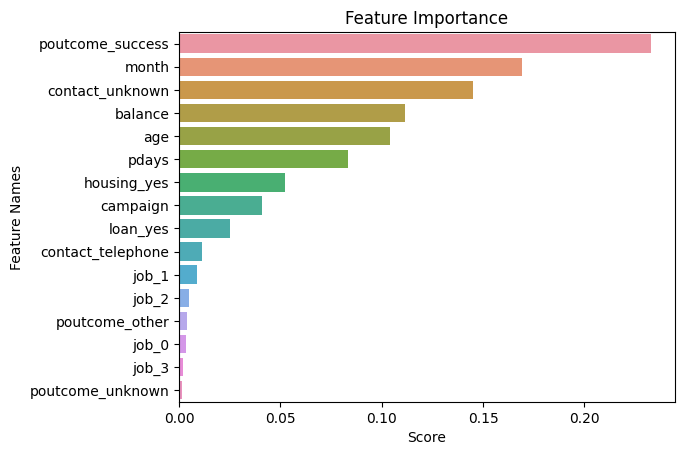

In [36]:
score = best_model['Model'].feature_importances_
feature_score = list(zip(all_cols,score))
feature_importances = pd.DataFrame(data=feature_score,columns=['Feature Names','Score']).sort_values('Score',ascending=False)
sns.barplot(x=feature_importances['Score'],y=feature_importances['Feature Names'],orient='h')
plt.title("Feature Importance")
plt.show()

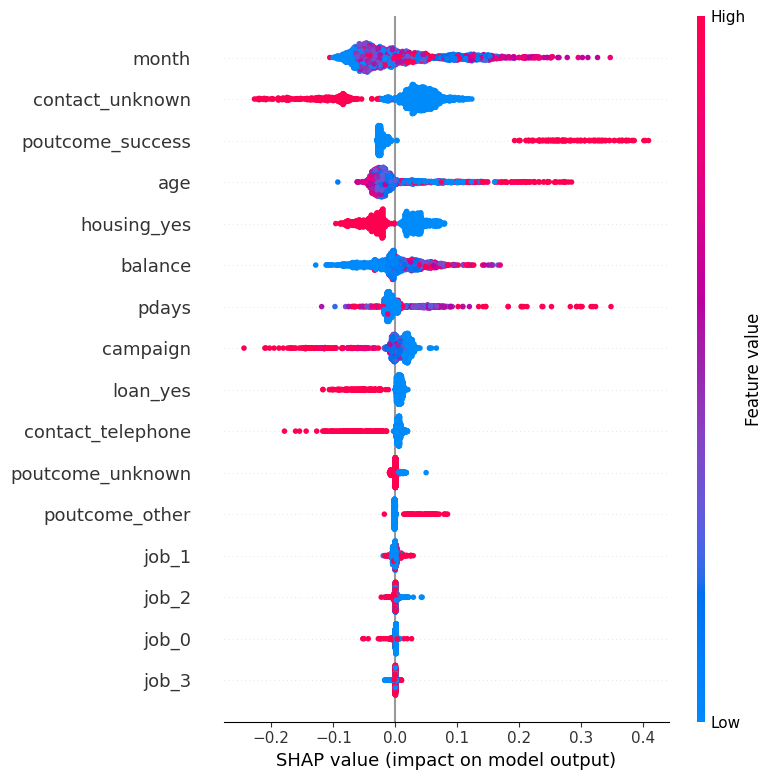

In [37]:
np.bool = np.bool_
import shap

model = best_model['Model']
X_test_transform = best_model.named_steps['CTransform'].transform(X_test)

explainer = shap.TreeExplainer(model,data = X_test_transform,feature_perturbation="interventional",
                                 model_output="probability")
shap_values = explainer.shap_values(X_test_transform)
shap.summary_plot(shap_values, X_test_transform,feature_names=all_cols)

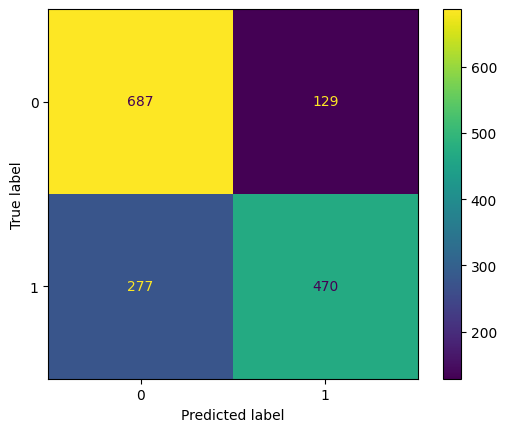

Classfication Tunned 
               precision    recall  f1-score   support

           0       0.71      0.84      0.77       816
           1       0.78      0.63      0.70       747

    accuracy                           0.74      1563
   macro avg       0.75      0.74      0.74      1563
weighted avg       0.75      0.74      0.74      1563



In [38]:
confusion_tunned = confusion_matrix(y_test,predict_tunned)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_tunned,display_labels=best_model.classes_)
disp.plot()
plt.show()
print(f"Classfication Tunned \n",report_tunned)

## Conclusions & Recommendations

**Conclusion**

-  Based on the classification report on the test data, the `recall` has a value of 63% for class 1, which means out of 747 prospective customers, 470 of them are truly interested in making a deposit. The `precision` has a value of 79% for class 1, which means out of 598 prospective customers, 470 of them are truly interested in making a deposit.

    Assuming that the cost each prospective customer for marketing campaign is $18.34 (source: https://thefinancialbrand.com/news/bank-marketing/bank-marketing-budgets-advertising-roi-strategy-88835/) and considering that I have a total of 200 prospective customers within a certain time frame (assuming 100 prospective customers are interested and 100 prospective customers are not interested), the calculations would be approximately as follows :

    - Without Model (assuming all prospective customers are interested and all of them are offered) :

        -   Total Cost -> 200 x 18,34 USD = 3668 USD.
        -   Total interested prospective customers acquired ->  100 prospective customers.
        -   Wasted cost -> 100 x 18,34 USD = 1834 USD (as 100 prospective customers decline and it becomes futile).
          <br><br>
    - With Model (only prospective customers predicted as interested will be offered) :
        - Confusion Matrix :
            -   TP: 63
            -   TN: 83
            -   FP: 17
            -   FN: 37
              
        - From the above Confusion Matrix, out of the 100 prospective customers (63+37), 63 of them are truly interested, and 37 are not interested. The calculations are as follows : 
            - Total Cost -> 100 x 18,34 USD = 1834 USD.
            - Total interested prospective customers acquired -> 63 prospective customers. 
            - Wasted cost => 37 x 18,34 USD = 679 USD (as 37 prospective customers decline and it becomes futile). 

   According to the above calculation example, the model can reduce the required cost for marketing campaigns by 50%, from the previous 3668 USD to 1834 USD. Furthermore, the model can minimize wasted costs by 37%, from the previous 1834 USD to 679 USD. 
   
   In Addition, the model can also estimate or minimize wasted costs by False Positive (FP) value. If calculate, the wasted costs from False Positive (FP) is 311 USD (17 (FP) x 18,34 USD).

- The likelihood of a prospective customer being interested in making a deposit depends on several features in the data, including :
    - `poutcome_success` : This feature represents the outcome of previous campaigns and has values of 0 (failure) and 1 (success).  If `poutcome_success` is 1 (success), the probability of being predicted as interested in a deposit increases. Conversely, if `poutcome_success` is 0 (failure), the probability of being predicted as not interested in a deposit increases.
    - `contact_unknown` This feature represents the method used to contact prospective customers and has values of 0 (known) and 1 (unknown). If `contact_unknown` is 1 (unknown), the probability of being predicted as not interested in a deposit increases. Conversely, if `contact_unknown` is 0 (known), the probability of being predicted as interested in a deposit increases.
    - `month` This feature indicates the month of the last contact with the prospective customer. If the last contact was more recent (lower value), the probability of being predicted as not interested in a deposit increases. Conversely, if the last contact was further in the past (higher value), the probability of being predicted as interested in a deposit increases.
    


**Recommendation**

Things that can be done to further develop this project and improve the model :

   - Adding new features that can enhance the model's performance and influence prospective customers' interest in making a deposit. Some examples include :
      - Salary range : The salary range provides an estimate of a prospective customer's income. It is possible that a larger salary range for a prospective customer increases the likelihood of them being interested in making a deposit.
      - Marital status : Marital status indicates whether a prospective customer is single or married. If a prospective customer is married, their living expenses may be higher, which could potentially affect their interest in making a deposit.
      - Children : The "children" feature indicates whether a prospective customer has children or not. If a prospective customer has children, their financial responsibilities may be greater, which could influence their decision to make a deposit.
   <br><br>
   - If the goal is to acquire as many potential customers as possible or target Class 1, evaluation metrics such as recall, f1 score, or f2 score can be used.

   - Looking at the dataset, there is still a feature called `contact`, which indicates that marketing methods are currently being conducted through traditional marketing, such as offering deposits through phone calls. Therefore, it would be better and more effective to incorporate Digital Marketing Campaign methods (source: https://www.simplilearn.com/traditional-marketing-vs-digital-marketing-article). This is especially true since the developed model can already help reduce the costs required for Marketing Campaigns.